In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
def process_results(results_dict):
    """
    Reads classification report CSVs, extracts key metrics, and structures them into separate tables.

    Args:
        results_dict (dict): Keys = experiment names, Values = file paths to CSVs.

    Returns:
        dict of DataFrames: Processed results organized by metric.
    """
    precision_dfs, recall_dfs, f1_dfs, support_dfs = [], [], [], []
    accuracy_dict = {}

    for experiment, path in results_dict.items():
        # Read CSV
        df = pd.read_csv(path, index_col=0)

        # Extract core metrics
        precision = df[["precision"]].rename(columns={"precision": experiment})
        recall = df[["recall"]].rename(columns={"recall": experiment})
        f1_score = df[["f1-score"]].rename(columns={"f1-score": experiment})
        support = df[["support"]].rename(columns={"support": experiment})

        # Store per-class metrics
        precision_dfs.append(precision)
        recall_dfs.append(recall)
        f1_dfs.append(f1_score)
        support_dfs.append(support)

        # Store accuracy separately
        accuracy_dict[experiment] = df.loc["accuracy", "precision"]

    # Merge per-class tables
    precision_table = pd.concat(precision_dfs, axis=1)
    recall_table = pd.concat(recall_dfs, axis=1)
    f1_table = pd.concat(f1_dfs, axis=1)
    support_table = pd.concat(support_dfs, axis=1)

    # Create accuracy table
    accuracy_table = pd.DataFrame(accuracy_dict, index=["Accuracy"])

    return {
        "Precision": precision_table,
        "Recall": recall_table,
        "F1-score": f1_table,
        "Support": support_table,
        "Accuracy": accuracy_table
    }

In [6]:
# Example Usage
results_dict = {
    "ResNet-34_5epochs": "resnet34_5epochs_class_scores.csv",
    "ResNet-34_10epochs": "resnet34_10epochs_class_scores.csv",
    "ResNet-34_10epochs_noPretrain": "resnet34_10epochs_class_scores_notpretrained.csv",
    "ResNet-50_10epochs": "resnet50_10epochs_class_scores.csv"
}

# Process and plot results
res = process_results(results_dict)


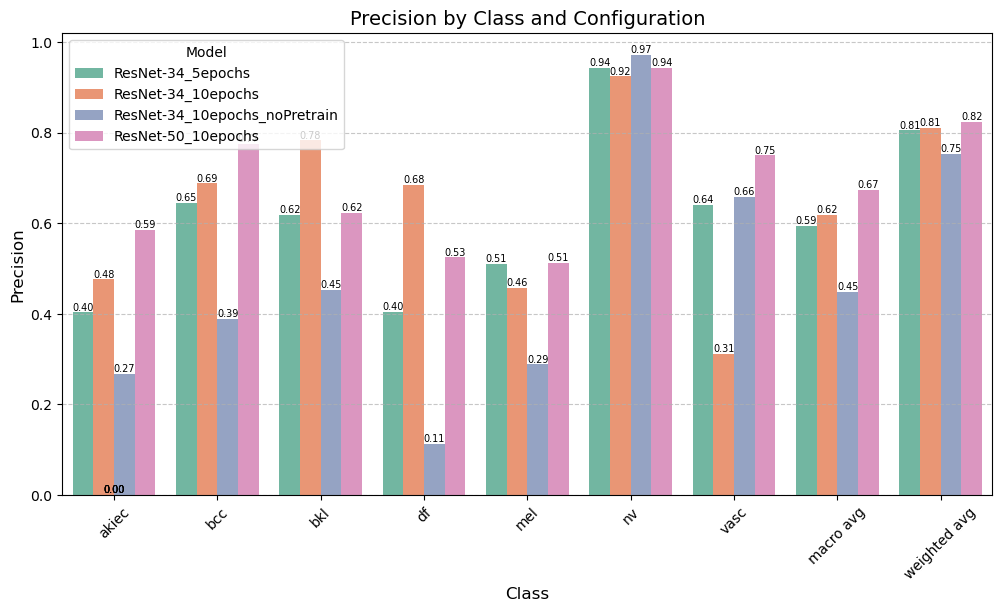

In [55]:
plot_metric(res["Precision"], "Precision")

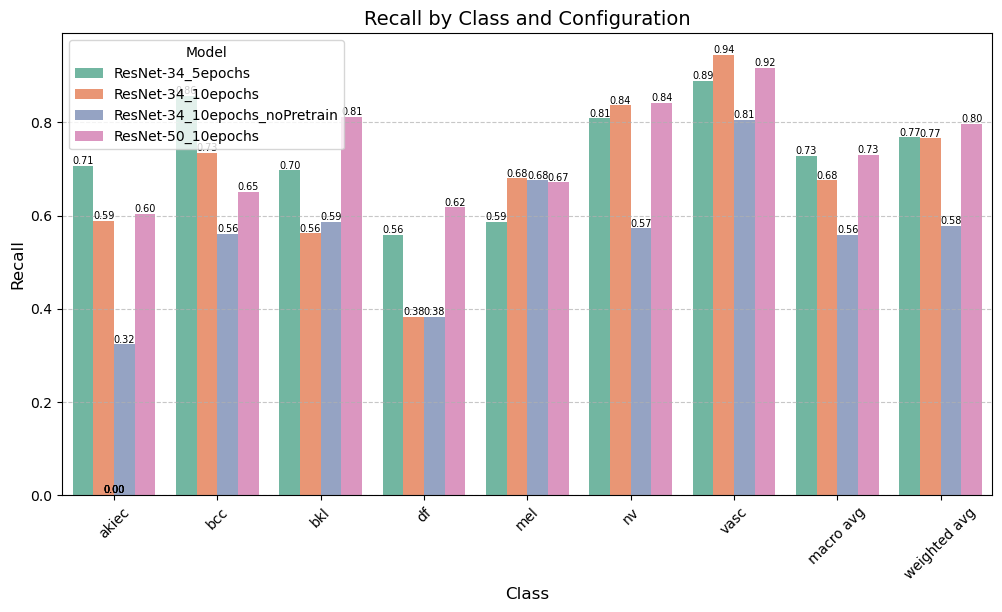

In [56]:
plot_metric(res["Recall"], "Recall")

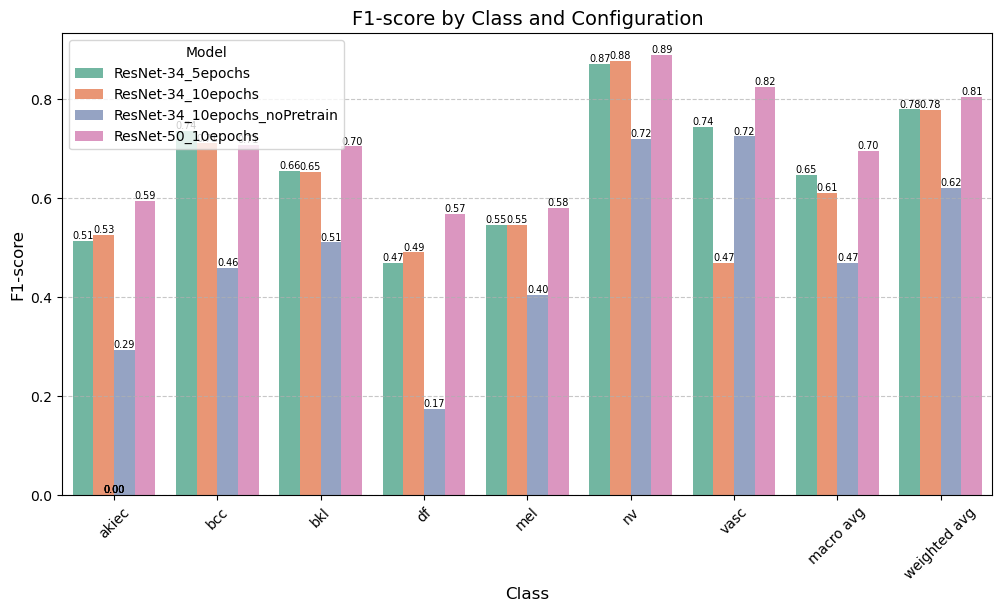

In [57]:
plot_metric(res["F1-score"], "F1-score")

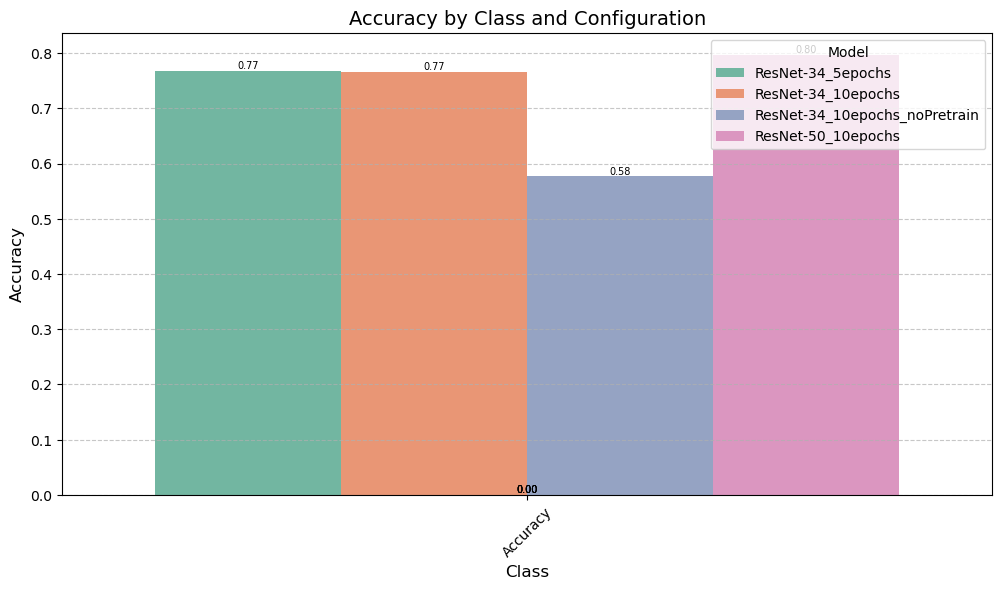

In [58]:
plot_metric(res["Accuracy"], "Accuracy")

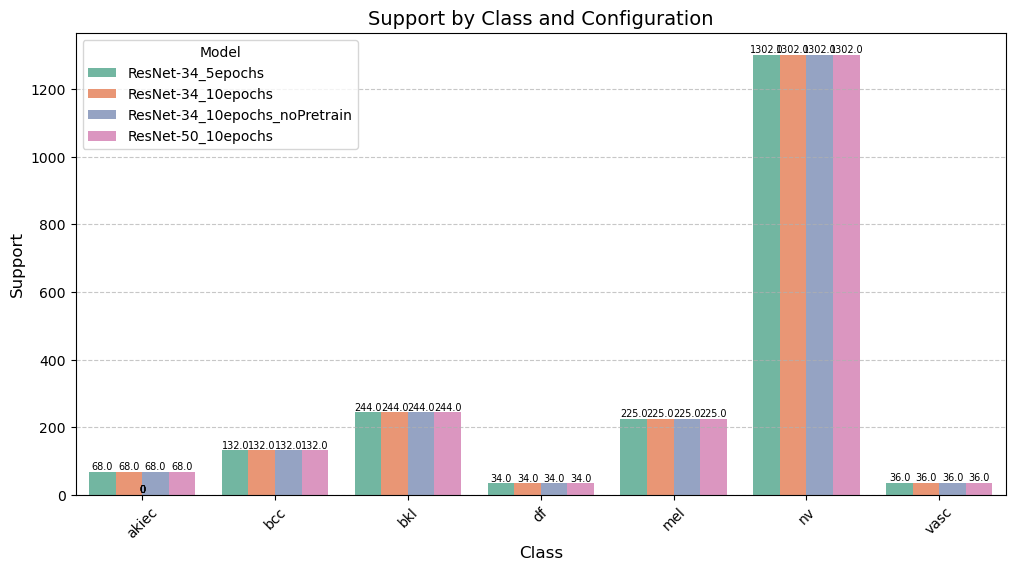

In [84]:
plot_metric(res["Support"], "Support")

In [83]:
def plot_metric(df, metric_name):
#     excluded_rows = ["accuracy"]
    excluded_rows = ["accuracy", "macro avg", "weighted avg"]
    df_filtered = df.loc[~df.index.isin(excluded_rows)].copy()

    # Melt for seaborn compatibility
    df_melted = df_filtered.reset_index().melt(id_vars="index", var_name="Model", value_name=metric_name)
    df_melted.rename(columns={"index": "Class"}, inplace=True)

    # Plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df_melted, x="Class", y=metric_name, hue="Model", palette="Set2")

#     Add value labels on bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=7, color='black', rotation=0)
    
    plt.title(f"{metric_name} by Class and Configuration", fontsize=14)
    plt.xlabel("Class", fontsize=12)
    plt.ylabel(metric_name, fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Model")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    plt.show()